# Grupo 3
Nomes: <br>
Daniel Moreira<br>
Lia Morimoto<br>
Ryan Ferreira<br>
Thiago Figueira

In [ ]:
# Importar biblioteca
from google.colab import files
import io

In [ ]:
# Adicionar dataset
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Importando as bibliotecas para trabalhar com os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lendo o arquivo CSV
df = pd.read_csv('heart.csv')

In [ ]:
# Conhecendo o dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Confirmando que não há valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Não será aplicado o **Dummy Variable** pois não existem variáveis categóricas *qualitativas* para tratar

In [ ]:
# Renomeando as colunas de forma mais descritiva
df.columns = ['age', 'sex', 'pain_type', 'blood_pressure', 'cholesterol', 'fasting_glicose', 'electro_rest', 'max_heart_rate', 'exercise_angina', 'depression_exercise', 'slope', 'vessels', 'thal', 'target']

Text(0.5, 1.0, 'Correlação entre colunas e a target')

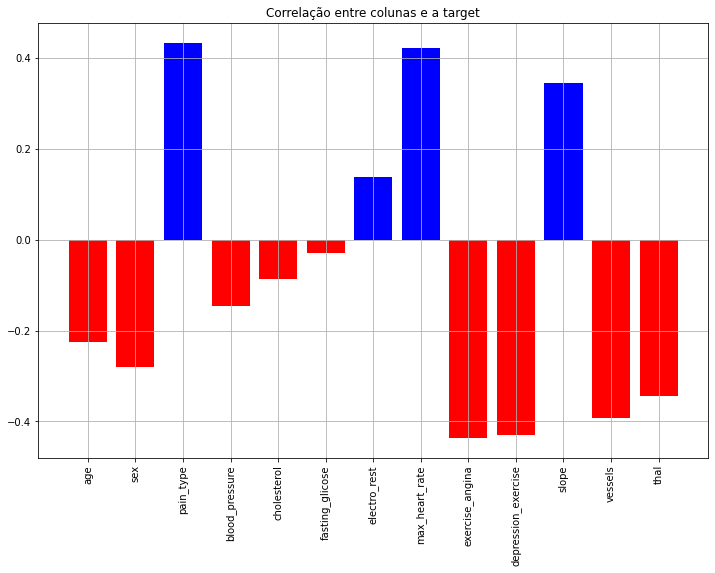

In [ ]:
# Observando a correlação entre as colunas e a target
colours = []
correlation_list = df.drop('target', axis=1).corrwith(df.target) >= 0

for corr in correlation_list:
  if corr:
    colours.append('blue')
  else:
    colours.append('red')

plt.figure(figsize=(12, 8))
plt.bar(x=df.drop('target', axis=1).columns, height=df.drop('target', axis=1).corrwith(df.target), color=colours)
plt.grid()
plt.xticks(rotation=90)
plt.title('Correlação entre colunas e a target')

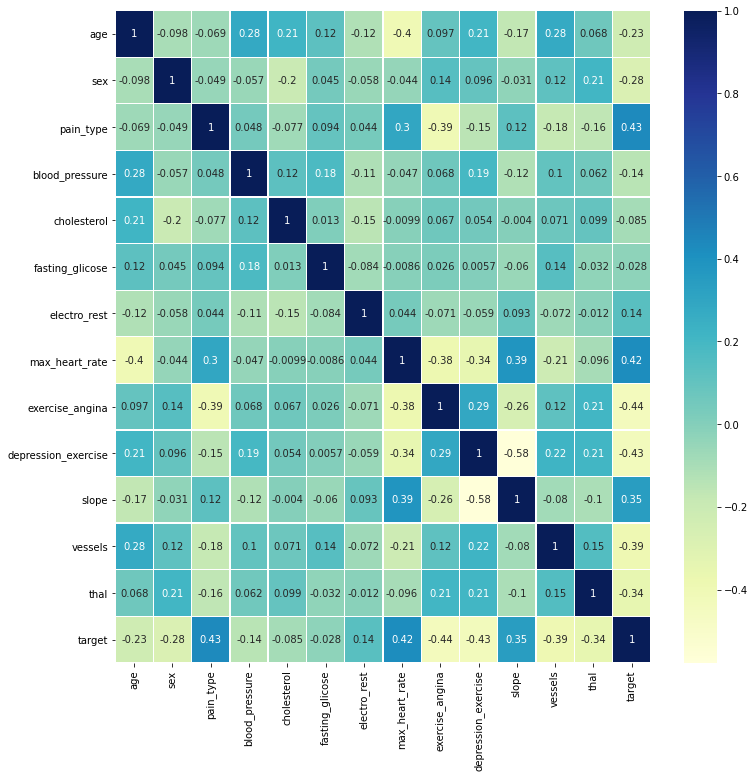

In [ ]:
# Outro método para analisar a correlação
correlation = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, linewidths=0.3, cmap="YlGnBu")

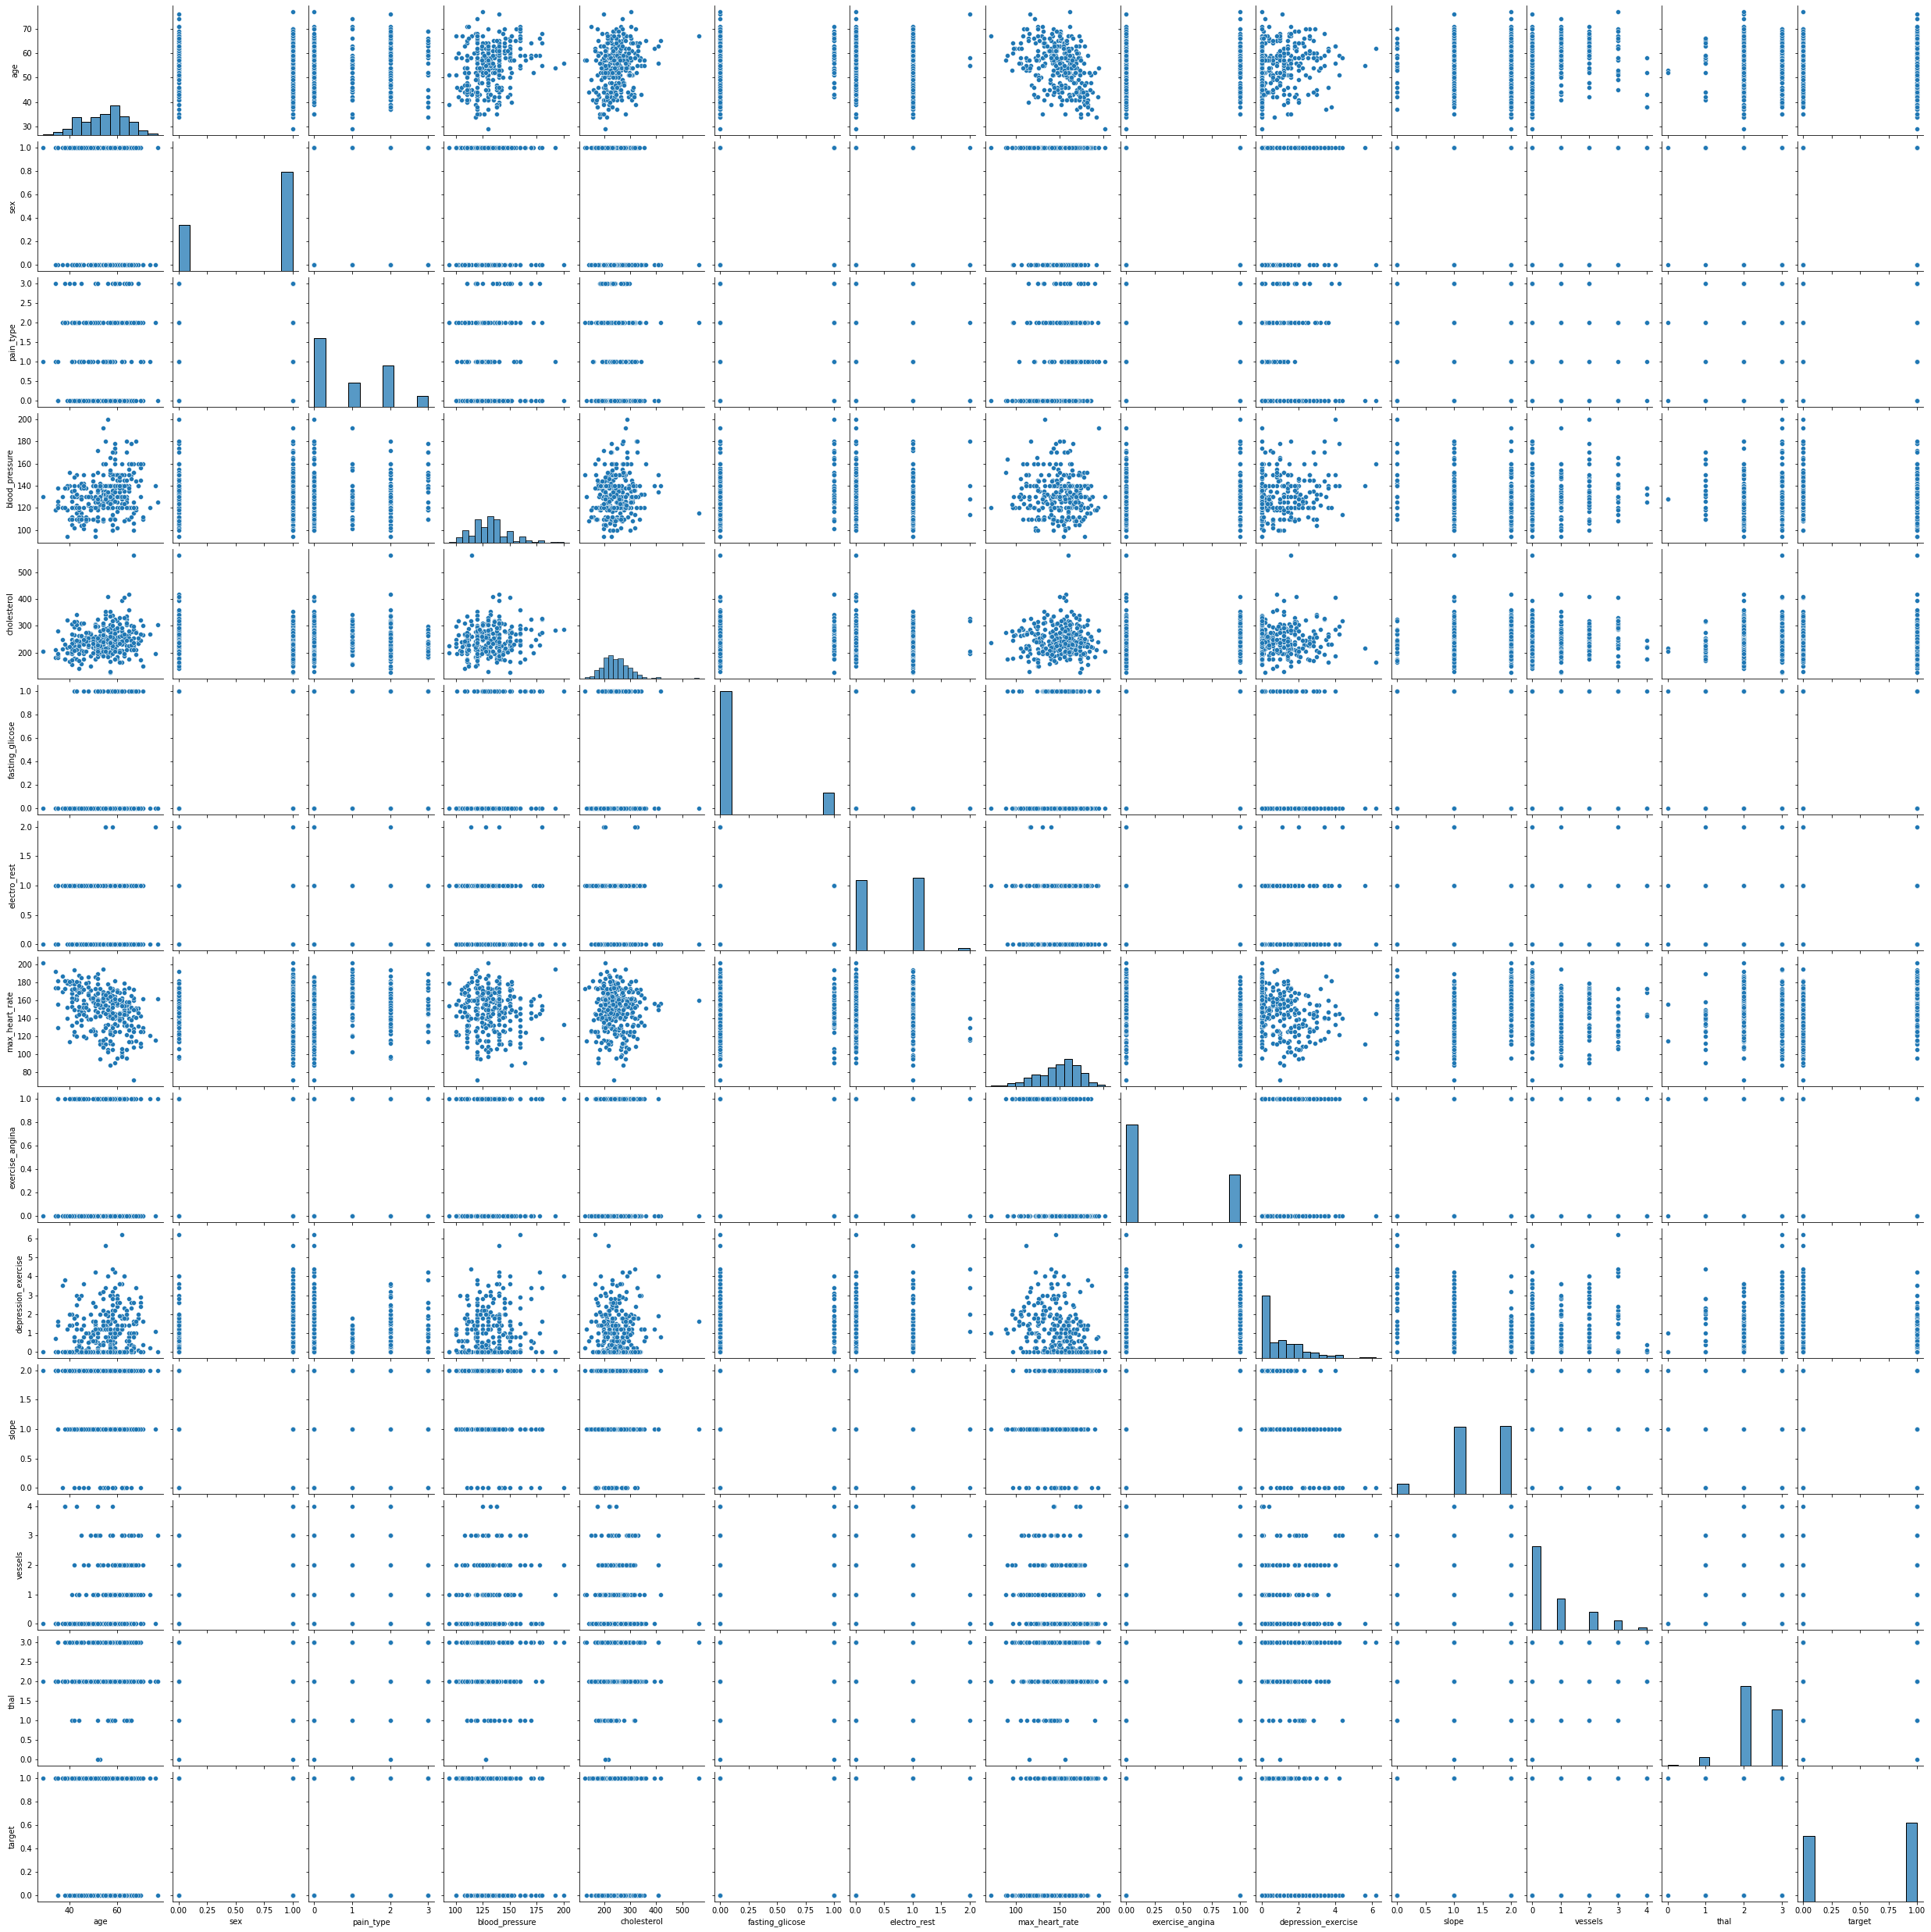

In [ ]:
sns.pairplot(df)

([<matplotlib.axis.XTick at 0x7f56839f1890>,
 [Text(0, 0, 'não'), Text(0, 0, 'sim')])

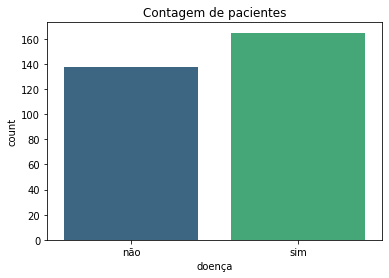

In [ ]:
# Contagem dos pacientes que possuam ou não a doença
sns.countplot(x='target', data=df, palette="viridis")
plt.title('Contagem de pacientes')
plt.xlabel('doença')
plt.xticks([0, 1],  labels=['não', 'sim'])

In [ ]:
# Splitting dependent and independent variables 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# importando os classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Definindo uma função para rodar os classifiers
def run_classifiers(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
     Script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: Dictionary of train, test and result sets
    '''
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier(n_neighbors=7)),
          ('SVM', SVC()),
          ('SVM_Poly', SVC(kernel='poly')), 
          ('GNB', GaussianNB()),
          ('DecisionTree', DecisionTreeClassifier())]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['1', '0']
    final = {}
    
    for model_name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            final[model_name] = (model, X_train, y_train, X_test, y_pred)
            
            print(model_name)
            report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            display(report_df)
     
    return final

In [ ]:
final = run_classifiers(X_train, y_train, X_test, y_test)

LogReg


,precision,recall,f1-score,support
1,0.833333,0.862069,0.847458,29.000000
0,0.870968,0.843750,0.857143,32.000000
accuracy,0.852459,0.852459,0.852459,0.852459
macro avg,0.852151,0.852909,0.852300,61.000000
weighted avg,0.853076,0.852459,0.852538,61.000000


RF


,precision,recall,f1-score,support
1,0.827586,0.827586,0.827586,29.000000
0,0.843750,0.843750,0.843750,32.000000
accuracy,0.836066,0.836066,0.836066,0.836066
macro avg,0.835668,0.835668,0.835668,61.000000
weighted avg,0.836066,0.836066,0.836066,61.000000


KNN


,precision,recall,f1-score,support
1,0.900000,0.931034,0.915254,29.000000
0,0.935484,0.906250,0.920635,32.000000
accuracy,0.918033,0.918033,0.918033,0.918033
macro avg,0.917742,0.918642,0.917945,61.000000
weighted avg,0.918614,0.918033,0.918077,61.000000


SVM


,precision,recall,f1-score,support
1,0.838710,0.896552,0.866667,29.000000
0,0.900000,0.843750,0.870968,32.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.869355,0.870151,0.868817,61.000000
weighted avg,0.870862,0.868852,0.868923,61.000000


SVM_Poly


,precision,recall,f1-score,support
1,0.896552,0.896552,0.896552,29.000000
0,0.906250,0.906250,0.906250,32.000000
accuracy,0.901639,0.901639,0.901639,0.901639
macro avg,0.901401,0.901401,0.901401,61.000000
weighted avg,0.901639,0.901639,0.901639,61.000000


GNB


,precision,recall,f1-score,support
1,0.838710,0.896552,0.866667,29.000000
0,0.900000,0.843750,0.870968,32.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.869355,0.870151,0.868817,61.000000
weighted avg,0.870862,0.868852,0.868923,61.000000


DecisionTree


,precision,recall,f1-score,support
1,0.750000,0.931034,0.830769,29.000000
0,0.920000,0.718750,0.807018,32.000000
accuracy,0.819672,0.819672,0.819672,0.819672
macro avg,0.835000,0.824892,0.818893,61.000000
weighted avg,0.839180,0.819672,0.818309,61.000000


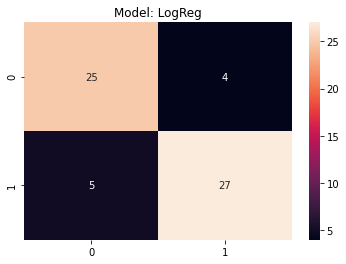

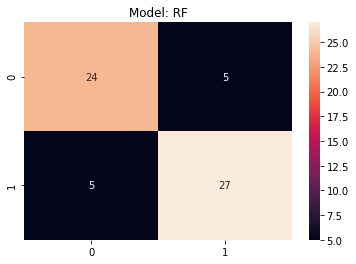

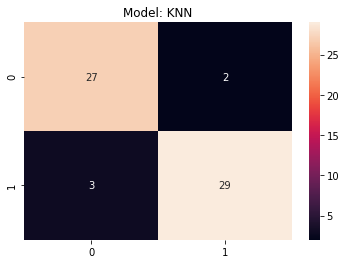

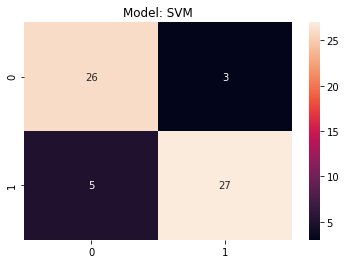

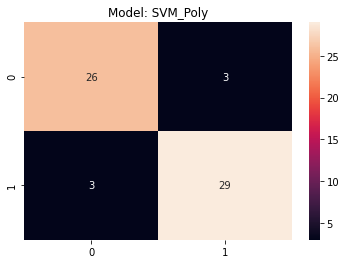

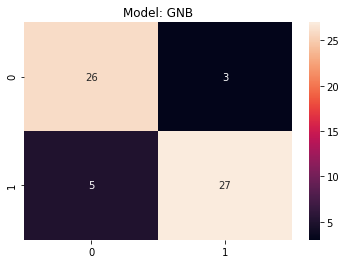

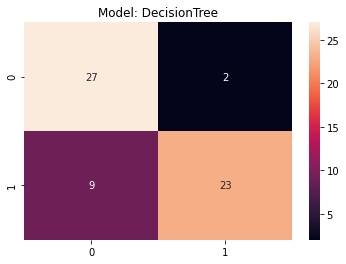

In [ ]:
# Gerando a matriz de confusão
from sklearn.metrics import confusion_matrix

for keys, values in final.items():
    model_name = keys
    (model, X_train, y_train, X_test, y_pred) = values

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    
    plt.title("Model: " + model_name)
    plt.show()

### Conclusão

O KNN apresentou melhores valores de acurácia e f1-score.